# Image Segmentation using K-Means Clustering

## Project Overview

This project implements **K-Means clustering** for color-based image segmentation. K-Means is an unsupervised machine learning algorithm that partitions an image into K distinct regions (clusters) based on color similarity. This approach is particularly effective for segmenting images with distinct color regions.

---

## What is K-Means Clustering?

**K-Means** is an unsupervised learning algorithm that groups similar data points into clusters. In the context of image segmentation:

- Each pixel is treated as a data point in 3D color space (R, G, B)
- The algorithm groups pixels with similar colors into K clusters
- Each cluster is represented by its centroid (average color)
- All pixels in a cluster are assigned the same color (centroid color)

---

## How K-Means Works for Images

### Algorithm Steps:

1. **Initialization**: 
   - Reshape image into a 2D array where each row is a pixel (with R, G, B values)
   - Randomly select K initial cluster centers (colors)

2. **Assignment Step**:
   - Assign each pixel to the nearest cluster center
   - "Nearest" is determined by Euclidean distance in RGB color space

3. **Update Step**:
   - Calculate the mean color of all pixels in each cluster
   - Move cluster centers to these mean positions

4. **Iteration**:
   - Repeat steps 2-3 until convergence
   - Convergence occurs when cluster centers stop moving significantly

5. **Reconstruction**:
   - Replace each pixel with its cluster center color
   - Reshape back to original image dimensions


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


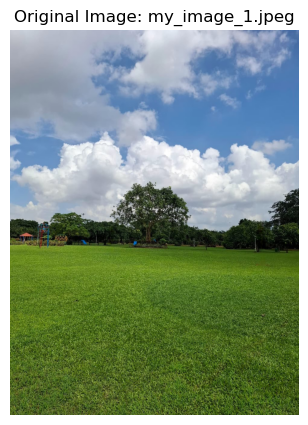

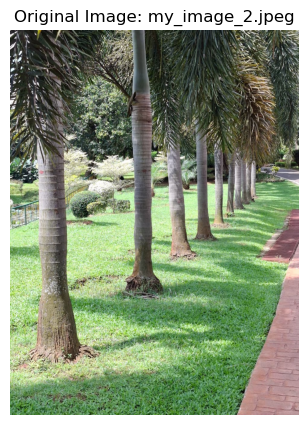

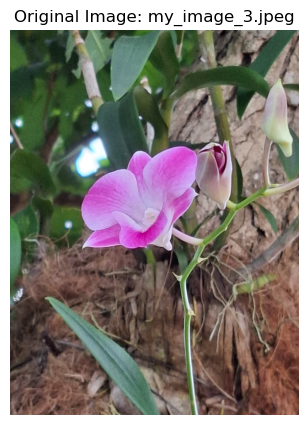

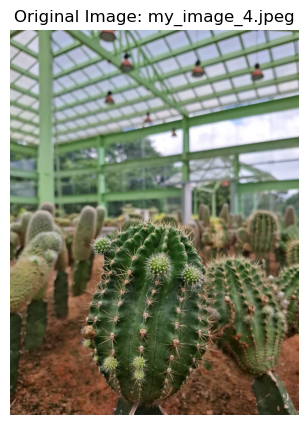

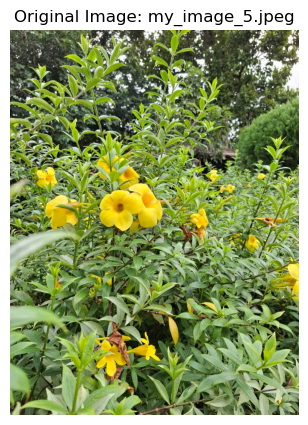

In [3]:
image_folder = "Images"  # Folder where your images are stored
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img_rgb)
    plt.title(f"Original Image: {img_file}")
    plt.axis('off')
    plt.show()


## Key Parameter: K (Number of Clusters)

### What is K?

K represents the number of distinct color regions in the segmented image. Choosing the right K is crucial:

### Selecting K:

**Small K (K=2-3)**:
- **Use case**: Images with few distinct regions
- **Result**: High abstraction, bold segmentation
- **Example**: Sky vs. ground, foreground vs. background

**Medium K (K=4-6)**:
- **Use case**: Balanced segmentation for most natural images
- **Result**: Captures major color variations
- **Example**: Our implementation uses K=4

**Large K (K=7-10+)**:
- **Use case**: Images with many color variations
- **Result**: Detailed segmentation, closer to original
- **Trade-off**: May not simplify the image much

---

## Implementation Details

### Step 1: Image Loading and Color Conversion
```python
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
```
- OpenCV loads images in BGR format
- We convert to RGB for correct color representation
- Each pixel now has 3 values: Red, Green, Blue (0-255)

### Step 2: Reshaping the Image
```python
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
```
- **Original shape**: (Height × Width × 3)
- **Reshaped**: (Height × Width, 3) = (N pixels, 3 color channels)
- **Why?** K-Means expects 2D array where each row is a data point
- **Float32**: Required by OpenCV's kmeans function for better precision

### Step 3: K-Means Configuration
```python
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
```

**Termination Criteria:**
- `cv2.TERM_CRITERIA_EPS`: Stop when cluster centers move less than 0.2
- `cv2.TERM_CRITERIA_MAX_ITER`: Stop after maximum 100 iterations
- **Purpose**: Prevents infinite loops while ensuring convergence

### Step 4: Applying K-Means
```python
_, labels, centers = cv2.kmeans(
    pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
)
```

**Parameters Explained:**
- `pixel_values`: Input data (pixels)
- `K`: Number of clusters (4 in our implementation)
- `None`: Initial labels (None = algorithm chooses randomly)
- `criteria`: Termination criteria defined above
- `10`: Number of times algorithm runs with different initial centers
- `cv2.KMEANS_RANDOM_CENTERS`: Random initialization method

**Returns:**
- `_`: Compactness measure (ignored)
- `labels`: Cluster assignment for each pixel (0 to K-1)
- `centers`: Final cluster center colors (K colors)

### Step 5: Creating Segmented Image
```python
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(img_rgb.shape)
```

**Process:**
1. Convert centers back to uint8 (0-255 range)
2. Map each pixel to its cluster center color using labels
3. Reshape back to original image dimensions

---

## Understanding the Results

### What Happens During Segmentation:

1. **Color Reduction**: Image is reduced to K dominant colors
2. **Region Grouping**: Similar colored regions merge together
3. **Boundary Creation**: Clear boundaries form between clusters
4. **Simplification**: Complex color variations become uniform regions

### Visual Interpretation:

- **Similar colors merge**: Sky becomes uniform blue
- **Objects group together**: Grass becomes uniform green
- **K colors dominate**: Final image has exactly K distinct colors
- **Details may be lost**: Subtle color variations disappear

In [4]:
def kmeans_segmentation(image_path, K=3):
    # Step 1: Read and convert image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Step 2: Reshape image into 2D array of pixels
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Step 3: Define criteria and apply KMeans
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(
        pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # Step 4: Convert centers back to uint8 (RGB colors)
    centers = np.uint8(centers)

    # Step 5: Replace pixel values with cluster center
    segmented_data = centers[labels.flatten()]

    # Step 6: Reshape back to original image dimensions
    segmented_image = segmented_data.reshape(img_rgb.shape)

    return img_rgb, segmented_image


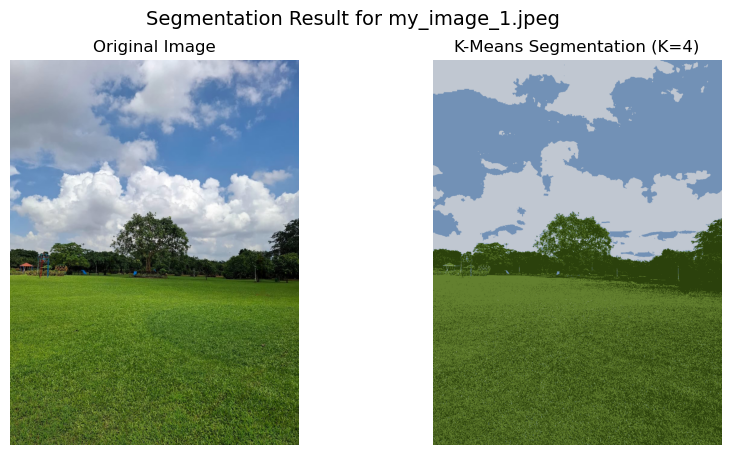

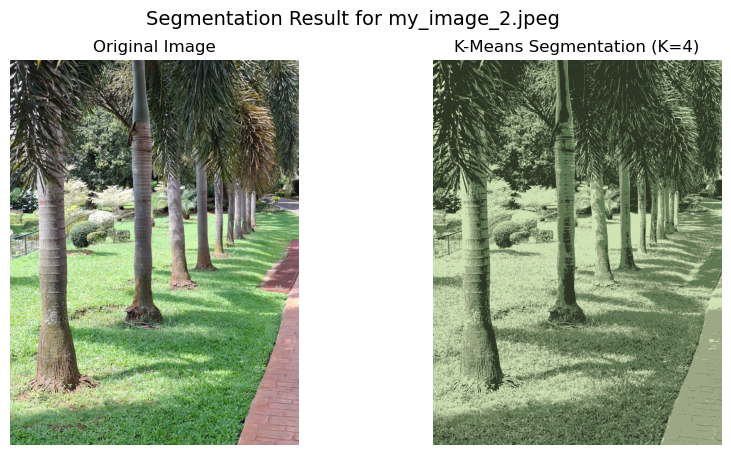

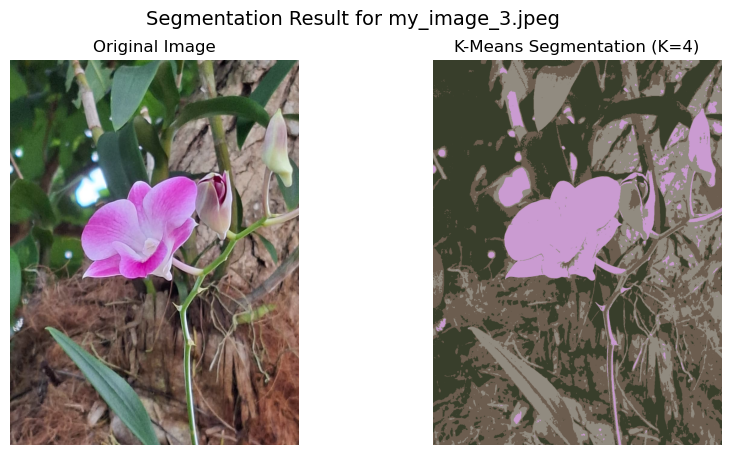

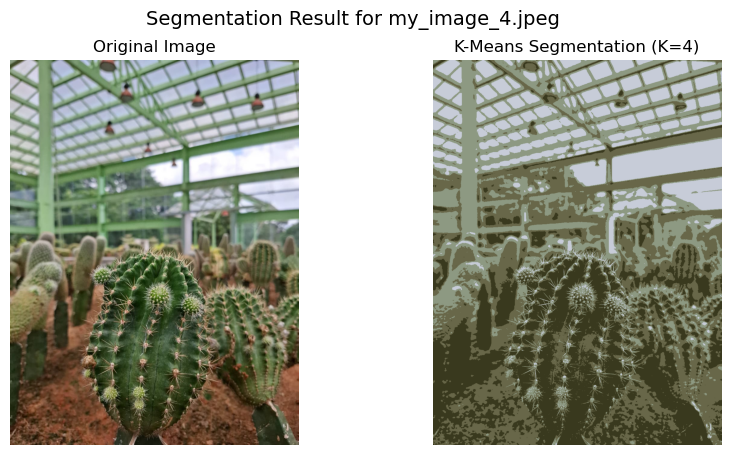

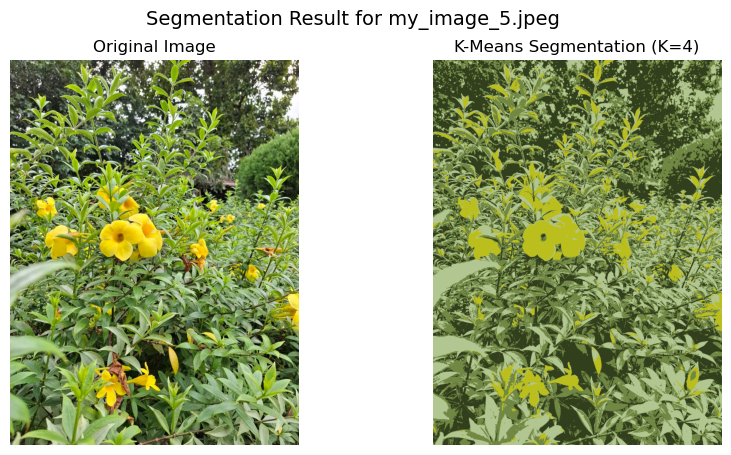

In [5]:
K = 4  # Number of clusters (change this to experiment)

for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    original, segmented = kmeans_segmentation(img_path, K)

    # Display results side-by-side
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(segmented)
    plt.title(f"K-Means Segmentation (K={K})")
    plt.axis('off')

    plt.suptitle(f"Segmentation Result for {img_file}", fontsize=14)
    plt.show()


## Advantages of K-Means Segmentation

1. **Simple and intuitive**: Easy to understand and implement  
2. **Fast computation**: Efficient even for large images  
3. **Color-based**: Works well with distinct color regions  
4. **Unsupervised**: No training data required  
5. **Scalable**: Can handle images of any size  
6. **Deterministic results**: With same initialization, produces same results

---

## Limitations

1. **K must be specified**: Requires prior knowledge or experimentation  
2. **Sensitive to initialization**: Different starts may give different results  
3. **Assumes spherical clusters**: May not work well with irregular shapes  
4. **Color-only**: Doesn't consider spatial relationships between pixels  
5. **Outliers affect results**: Noise pixels can distort cluster centers  
6. **Local minima**: May converge to suboptimal solutions

---

## Applications

 1. **Image Compression**
 2. **Object Extraction**
 3. **Medical Imaging**
 4. **Satellite Imagery**
 5. **Computer Graphics**

---

## Conclusion

K-Means clustering provides an effective, unsupervised approach to color-based image segmentation. Its simplicity and computational efficiency make it ideal for applications requiring quick color quantization or region-based analysis. While it has limitations, understanding the parameter K and applying appropriate preprocessing can yield excellent segmentation results for a wide range of images.